## Семинар 1 "Полносвязные нейронные сети"

ФИО: Дегтярев Роман Олегович

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src=backprop.pdf width=400>

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

Важным требованием к реализации является векторизация всех слоев: все операции должны быть сведены к матричным, не должно быть циклов. Это значительно уменьшает временные затраты.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

### Часть 1: Линейный слой


In [2]:
#it's to escape shape error when trying x.dot(y)
def error_shape(x,y):
        result = np.zeros(())
        for i in range(0,2):
            for j in range(0,2):
                if (x.shape[1]!=y.shape[0]):
                    x = x.T
                else:
                    return x,y
            y = y.T

In [3]:
    class Linear:
        def __init__(self, input_size, output_size, learning_rate, N):
            '''
            Creates weights and biases for linear layer.
            Dimention of inputs is *input_size*, of output: *output_size*.
            '''
            #### YOUR CODE HERE
            #### Create weights, initialize them with samples from N(0, 0.1).
            mu, sigma = 0, 0.1 # mean and standard deviation
            self.weights = np.random.normal(mu,sigma,(output_size,input_size))#shape(1,N)
            self.y = np.zeros(())
            self.X = np.zeros(())
            self.alpha = learning_rate
            self.N = N#number of rows

            pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.weights, X = error_shape(self.weights, X)
        y = np.dot(self.weights,X)
        self.X = X#for backward
        return y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        self.X, dLdy = error_shape(self.X, dLdy)
        self.dLdw = np.dot(self.X, dLdy)
        self.weights, dLdy = error_shape(self.weights,dLdy)
        dLdx = np.dot(self.weights, dLdy)
        return dLdx
    
    def step(self):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        #### YOUR CODE HERE
        for i in range(self.weights.shape[0]):
            self.weights[i,0] = self.weights[i,0] - self.alpha*self.dLdw[i,0]/self.N
        pass

### Часть 2: Численный градиент

Релизуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

In [4]:
np.max(np.array([1,2,3]))

3

In [5]:
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    #### YOUR CODE HERE
    eps=np.finfo(float).eps
    grad_num = func(X+eps)-func(X-eps)/2*eps
    np.max(np.abs(grad_num-gradient))
    pass

Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

In [6]:
def backward(X,weights,dLdy, learning_rate, N):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        X, dLdy = error_shape(X, dLdy)
        dLdw = np.dot(X, dLdy)
        weights, dLdy = error_shape(weights,dLdy)
        dLdx = np.dot(weights, dLdy)
        step(weights, learning_rate, dLdw, N)
        return dLdx

In [7]:
def step(weights, learning_rate, dLdw, N):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        #### YOUR CODE HERE
        for i in range(self.w1.shape[0]):
            weights[i,0] = weights[i,0] - learning_rate*dLdw[i,0]/N
        return weights
        pass

In [8]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']

weights = np.random.normal(0, 0.1,(10,2))
X, weights = error_shape(X,weights)
N = X.shape[0]
y_=np.dot(X,weights)

dLdy = y - y_[:,0]
learning_rate = 0.01

In [9]:
# #### YOUR CODE HERE
# for i in range(0,2):
#     dLdx = backward()
#     check_gradient()

### Часть 3: Сигмоида

In [10]:
class Sigmoid:
    def __init__(self):
        pass
    
    def sigmoid_func(self, X):
        return 1/(1+np.exp(-X))
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.prob = self.sigmoid_func(X)
        return self.prob
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        dLdx = (1 - self.prob)*self.prob
        return dLdx
        pass
    
    def step(self, learning_rate):
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [11]:
#### YOUR CODE HERE


### Часть 4: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://hips.seas.harvard.edu/blog/2013/01/09/computing-log-sum-exp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [33]:
import scipy as sp
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### YOUR CODE HERE
        #### (Hint: No code is expected here, just joking)
        self.loss=np.zeros(())
        self.pred = np.zeros(())
        self.t = np.zeros(())
        pass
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    def nlloss(self,true, pred):
        pred = np.maximum(10**-5, np.minimum(1-10**-5, pred))
        N = true.shape[0]
        loss =  (1/float(N)) * np.sum(np.sum((true*np.log(pred)),1),0)
        return loss
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.pred = self.softmax(X)
        self.loss= self.nlloss(y,self.pred)
        all_loss.append(self.loss)
        self.t = y
        pass 
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        return (self.pred - self.t)
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [13]:
#### YOUR CODE HERE

### Часть 5, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [71]:
class NeuralNetwork:
    def __init__(self, modules, learning_rate):
        '''
        Constructs network with *modules* as its layers
        '''
        #### YOUR CODE HERE
        self.model_list=[]
        for (module,value) in zip(modules.keys(),modules.values()):
            if re.match('Linear'+r"(\d+)", module):
                self.model_list.append(Linear(value[0],value[1],learning_rate, value[2]))
            if re.match('Sigmoid'+r"(\d+)", module):
                self.model_list.append(Sigmoid())
        self.model_list.append(NLLLoss())
        self.y_pred = np.zeros(())
        pass
    
    def forward(self, X, y_true):
        #### YOUR CODE HERE
        #### Apply layers to input
        if len(self.model_list)==6:
            self.y_pred = self.model_list[4].forward(self.model_list[3].forward(
                    self.model_list[2].forward(self.model_list[1].forward(
                        self.model_list[0].forward(X)))))
            
            self.model_list[5].forward(self.y_pred, y_true)
            self.dLdy = self.model_list[5].backward()
            
        else:
            print('Not appropriate architecture')
        pass
    
    def backward(self):
        '''
        dLdy here is a gradient from loss function
        '''
        #### YOUR CODE HERE
        dLdy = self.model_list[0].backward(self.model_list[1].backward(
            self.model_list[2].backward(self.model_list[3].backward(
                self.model_list[4].backward(self.dLdy)))))
        pass
    
    def step(self):
        for i in range(0,5):
            if i%2==0:
                self.model_list[i].step()
        pass

### Часть 6, обучение на простых данных

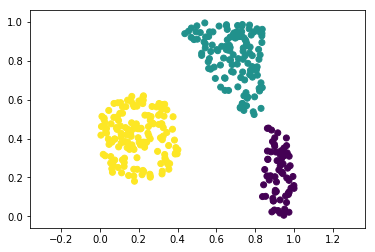

In [72]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.01). 
2. Нарисуйте график сходимости (изменение NLL со временем).
3. Нарисуйте разделяющую поверхность

Отличная визуализация: http://playground.tensorflow.org/

In [73]:
### YOUR CODE HERE:
N = X.shape[0]
modules = {'Linear1':[2, 10,N], 'Sigmoid2':[], 'Linear3':[10, 10, N], 'Sigmoid5':[], 'Linear6':[10, 3,N]}

In [74]:
all_loss = []
net = NeuralNetwork(modules, 0.01)
for i in range(0,10000):
    net.forward(X, y)
    net.backward()
    net.step()
    #print("Logloss:",all_loss[i])

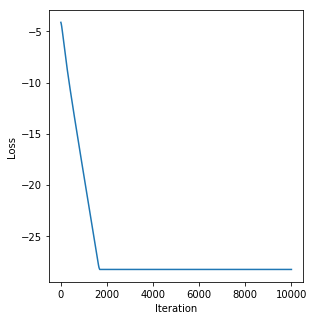

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.plot(range(len(all_loss)), all_loss)

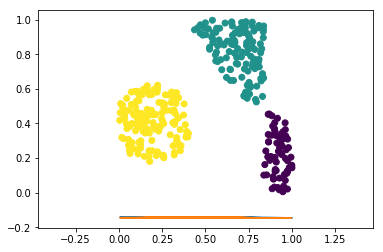

In [86]:
# Your Code Here

plt.plot(X,net.y_pred[1])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()


In [87]:
#Что-то пошло не так